In [1]:
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data_h_pos[-1]

array([2.07666667e-09, 4.08750000e+00])

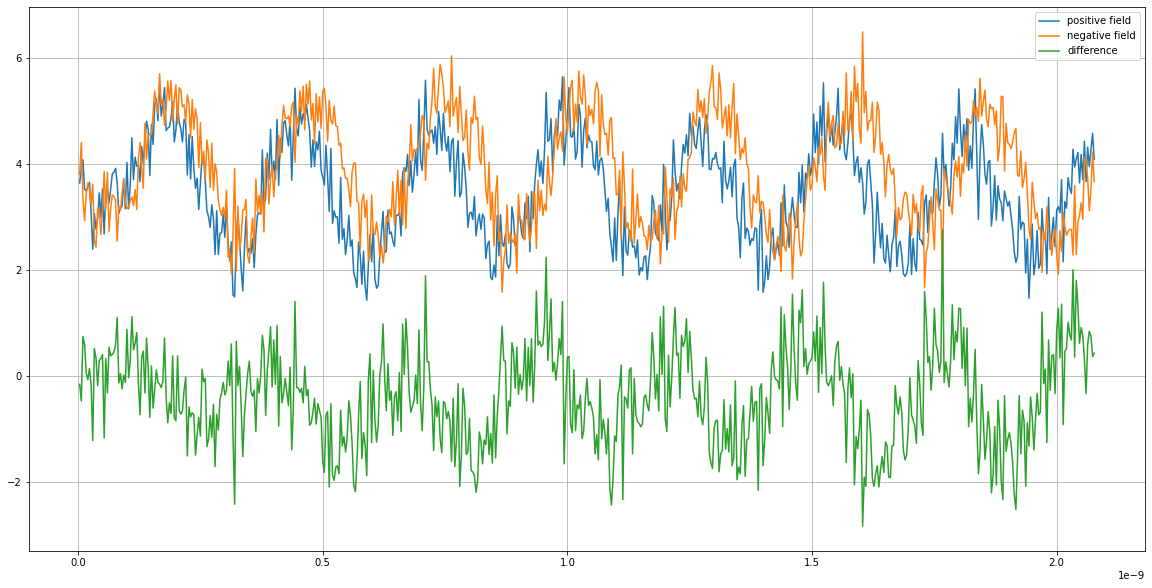

In [51]:
data_h_pos = np.loadtxt(r'data_exp\2022_09_06_Mlevy\positive_field1.dat')[:,:2]
data_h_pos[:, 0] = (data_h_pos[:, 0] - 178.78)*2/3/10**11
data_h_pos = data_h_pos[17:]
data_h_neg = np.loadtxt(r'data_exp\2022_09_06_Mlevy\negative_field1.dat')[:,:2]
data_h_neg[:, 0] = (data_h_neg[:, 0] - 178.78)*2/3/10**11
data_h_neg = data_h_neg[17:]

data_diff = data_h_pos[:, 1] - data_h_neg[:, 1]

plt.figure(figsize=(20, 10))
plt.plot(data_h_pos[:,0], data_h_pos[:,1], label='positive field')
plt.plot(data_h_neg[:,0], data_h_neg[:,1], label='negative field')
plt.plot(data_h_neg[:,0], data_diff, label='difference')
plt.legend()
plt.grid()

In [30]:
data_h_pos.shape

(623, 2)

Maximums are:
    positive freq=3768367346.938574, Amp=0.006373883925658656
    negative freq=3636734693.8773565, Amp=0.0059158616009086715
    differencs freq=3701020408.1630673, Amp=0.005105410787305227


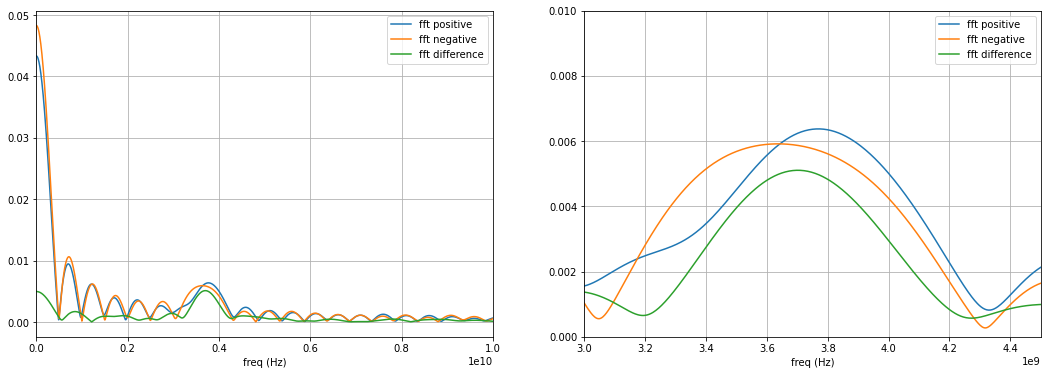

In [81]:
n = 10**5
h_pos_fft = 2/n*np.abs(fft(data_h_pos[:,1], n=n))
h_neg_fft = 2/n*np.abs(fft(data_h_neg[:,1], n=n))
diff_fft = 2/n*np.abs(fft(data_diff, n=n))
freqs = fftfreq(n, data_h_pos[-1, 0]-data_h_pos[-2, 0], )


fig, ax = plt.subplots(1, 2, figsize=(18,6))

ax[0].plot(freqs[:n//2], h_pos_fft[:n//2], label='fft positive')
ax[0].plot(freqs[:n//2], h_neg_fft[:n//2], label='fft negative')
ax[0].plot(freqs[:n//2], diff_fft[:n//2], label='fft difference')
ax[0].set_xlim((0, 10**10))
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('freq (Hz)')

ax[1].plot(freqs[:n//2], h_pos_fft[:n//2], label='fft positive')
ax[1].plot(freqs[:n//2], h_neg_fft[:n//2], label='fft negative')
ax[1].plot(freqs[:n//2], diff_fft[:n//2], label='fft difference')
ax[1].set_xlim((0.3*10**10, 0.45*10**10))
ax[1].set_ylim((0, 0.01))
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('freq (Hz)')

l_idx = (freqs[:n//2] <= 3.4*10**9).sum()
r_idx = n//2 - (freqs[:n//2] >= 4*10**9).sum()
l_idx, r_idx
max_pos = np.where(h_pos_fft == h_pos_fft[l_idx:r_idx].max())[0][0]
max_neg = np.where(h_neg_fft == h_neg_fft[l_idx:r_idx].max())[0][0]
max_diff = np.where(diff_fft == diff_fft[l_idx:r_idx].max())[0][0]
print(f"""Maximums are:
    positive freq={freqs[max_pos]}, Amp={h_pos_fft[max_pos]}
    negative freq={freqs[max_neg]}, Amp={h_neg_fft[max_neg]}
    differencs freq={freqs[max_diff]}, Amp={diff_fft[max_diff]}""")

(array([3.76836735e+09, 1.51831766e+00, 3.07402105e+00, 3.21235145e+00]),
 array([3.66192029e+09, 1.14999744e+00, 3.71110724e+00, 3.50603405e+00]))

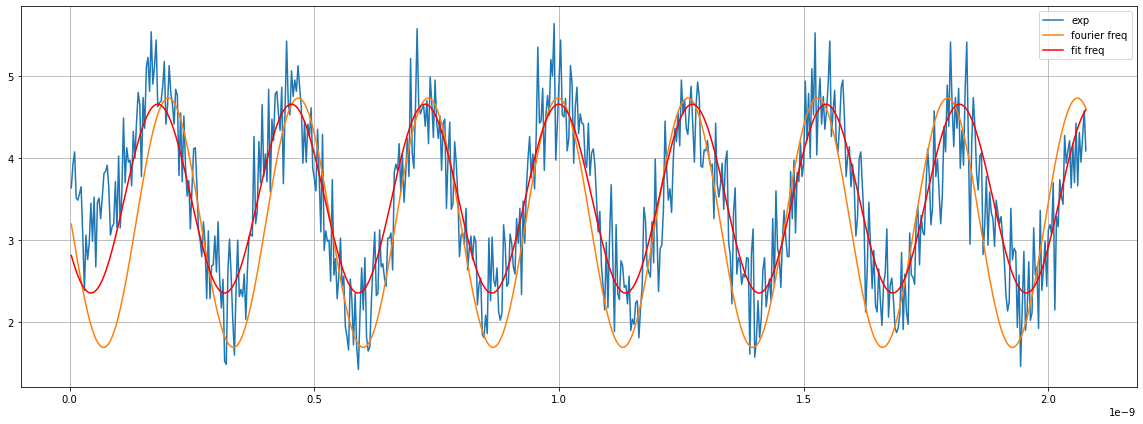

In [98]:
def fit_sine(x, freq, Amp, phase, shift):
    return Amp*np.sin(2*np.pi*freq*x + phase) + shift

p_opt, _ = curve_fit(fit_sine, data_h_pos[:, 0], data_h_pos[:, 1],
                 bounds=((freqs[max_pos]-1, 1, 0, 0 ), (freqs[max_pos], 3, 2*np.pi, 5)))
p_opt1, _ = curve_fit(fit_sine, data_h_pos[:, 0], data_h_pos[:, 1], p0=(freqs[max_pos], 1, 1, 1))

plt.figure(figsize=(20, 7))
plt.plot(data_h_pos[:,0], data_h_pos[:,1], label='exp')
plt.plot(data_h_pos[:,0], fit_sine(data_h_pos[:,0], *p_opt), label='fourier freq')
plt.plot(data_h_pos[:,0], fit_sine(data_h_pos[:,0], *p_opt1), 'r', label='fit freq')
plt.grid()
plt.legend()
p_opt, p_opt1